In [0]:
import tweepy
import re
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
sns.set_style('whitegrid')
sns.set_palette('GnBu_d')

In [2]:
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from tweepy import OAuthHandler

In [0]:
import os

In [5]:
os.getcwd()

'/content'

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Twitter Sentiment Analysis')

In [0]:
consumer_key = 'yoIwFkjZGYDa49aO16XqSNqcN'
consumer_secret = 'gl4LQOItV7Z1aFwNrlvaiKJ3t8o8h99blMIAmnmdHxYjzjRAxO' 
access_token = '624310916-E7fDF2IE8P6bfY1oVFglASf6F8RnxMd3vgSXFqnZ'
access_secret ='ID9JcoXHsDcKtvNcnmBGcCQhUlO0wmwAxBJ6LCesiUAas'


In [0]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,timeout=15)


In [0]:
places = api.geo_search(query="INDIA", granularity="country")

In [10]:
place_id = places[0].id
print('india id is: ',place_id)

india id is:  b850c1bfd38f30e0


In [11]:
places

[Place(_api=<tweepy.api.API object at 0x7f102ca594a8>, id='b850c1bfd38f30e0', url='https://api.twitter.com/1.1/geo/id/b850c1bfd38f30e0.json', place_type='country', name='India', full_name='India', country_code='IN', country='India', contained_within=[], centroid=[79.91569416233017, 20.568453], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x7f102ca594a8>, type='Polygon', coordinates=[[[67.997691, 6.622513], [67.997691, 33.254896], [97.170672, 33.254896], [97.170672, 6.622513], [67.997691, 6.622513]]]), attributes={}),
 Place(_api=<tweepy.api.API object at 0x7f102ca594a8>, id='88f6c97979c5c22d', url='https://api.twitter.com/1.1/geo/id/88f6c97979c5c22d.json', place_type='country', name='British Indian Ocean Territory', full_name='British Indian Ocean Territory', country_code='IO', country='British Indian Ocean Territory', contained_within=[], centroid=[71.3834071192206, -6.684143000000001], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x7f102ca594a8>, type='Polygon',

In [0]:
args = ['trump visit delhi']
delhi_tweets={}
query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",tweet_mode="extended",lang='en',locale='ja',result_type='recent',geocode="28.61309,77.209211,500km",truncated=False).items():

         delhi_tweets[status.created_at]=status.full_text    

In [0]:
delhi_tweets=pd.DataFrame(delhi_tweets.items(),columns=['Time_stamp','Text'])

In [14]:
delhi_tweets_copy=delhi_tweets.copy()
delhi_tweets.tail()

,Time_stamp,Text
315,2020-02-14 12:17:16,Trump is scheduled to make his first visit as ...
316,2020-02-14 12:02:03,Trump to woo Indian executives during New Delh...
317,2020-02-14 11:54:50,U.S. President Donald Trump will woo executive...
318,2020-02-14 04:36:19,@BJP4India after facing harsh defeat in Delhi ...
319,2020-02-13 19:29:35,The US has just signalled to India that there ...


In [15]:
delhi_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
Time_stamp    320 non-null datetime64[ns]
Text          320 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 5.1+ KB


In [16]:
delhi_tweets['Text'][5]

"@Cacofonix1008 Disagree..post trump visit it's time to enforce law.\nDelhi is becoming lawless."

In [0]:
args = ['trump agra']
agra_tweets={}
query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",tweet_mode="extended",lang='en',locale='ja',result_type='recent',geocode="27.174754,78.042244,200km").items():

         agra_tweets[status.created_at]=status.full_text      

In [0]:
agra_tweets=pd.DataFrame(agra_tweets.items(),columns=['Time_stamp','Text'])
agra_tweets.head()
agra_tweets_copy=agra_tweets.copy()

In [19]:
agra_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
Time_stamp    176 non-null datetime64[ns]
Text          176 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 2.9+ KB


In [0]:
args = ['trump motera stadium']
ahem_tweets={}
query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",tweet_mode="extended",lang='en',locale='ja',result_type='recent',geocode="23.056363,72.575153,500km").items():

         ahem_tweets[status.created_at]=status.full_text  

In [21]:
ahem_tweets=pd.DataFrame(ahem_tweets.items(),columns=['Time_stamp','Text'])
ahem_tweets_copy=ahem_tweets.copy()
ahem_tweets.head()

,Time_stamp,Text
0,2020-02-23 07:07:17,@realDonaldTrump \n@WhiteHouse \nThe welcome e...
1,2020-02-23 06:51:26,US Could deny H-1B Visa Cards benefits to Immi...
2,2020-02-23 06:43:01,"#मोदी_पहले_देश_का_सोचो\n\nAs well know, US Pre..."
3,2020-02-23 06:41:15,"#मोदी_पहले_देश_का_सोचो\n\nAs well know, US Pre..."
4,2020-02-23 06:39:50,"#मोदी_पहले_देश_का_सोचो\n\nAs well know, US Pre..."


In [22]:
ahem_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
Time_stamp    247 non-null datetime64[ns]
Text          247 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 4.0+ KB


In [0]:
from datetime import datetime
from pytz import timezone
tz_India = pytz.timezone('Asia/Kolkata')

In [69]:
str(datetime.now(tz_India))

2020-02-23 13:05:41.387146+05:30


In [0]:
def clean_text(data,col):
  corpus=[]
  for i in range(len(data[col])):
    text=re.sub(r'http\S+', ' ', data[col][i])
    text=text.lower()
    text=re.sub(r"that's","that is",text)
    text = re.sub(r"there's","there is",text)
    text = re.sub(r"what's","what is",text)
    text = re.sub(r"where's","where is",text)
    text = re.sub(r"it's","it is",text)
    text = re.sub(r"who's","who is",text)
    text = re.sub(r"i'm","i am",text)
    text = re.sub(r"she's","she is",text)
    text = re.sub(r"he's","he is",text)
    text = re.sub(r"they're","they are",text)
    text = re.sub(r"who're","who are",text)
    text = re.sub(r"ain't","am not",text)
    text = re.sub(r"wouldn't","would not",text)
    text = re.sub(r"shouldn't","should not",text)
    text = re.sub(r"can't","can not",text)
    text = re.sub(r"couldn't","could not",text)
    text = re.sub(r"won't","will not",text)
    text=re.sub(r'[@#\$%&\*\(\)\<\>\?\!\;\'\\-\_"]',' ',text)
    text= re.sub(r'\W',' ',text)
    text=re.sub(r'\d',' ',text)
    text=re.sub(r'^[a-z]\s',' ',text)
    text=re.sub(r'\s+[a-z]\s+',' ',text)
    text=re.sub(r'\s+[a-z]$',' ',text)
    text=re.sub(r'\s+',' ',text)
    corpus.append(text)
  return corpus

In [0]:
delhi_tweets['Text']=clean_text(delhi_tweets,'Text')

In [72]:
delhi_tweets.head()

,Time_stamp,Text
0,2020-02-23 06:51:02,wdf trump will visit shahinbagh also latest ja...
1,2020-02-23 06:08:06,ahead of us president donaldtrump visit to del...
2,2020-02-23 05:54:58,kejriwal sisodia won be allowed to be present ...
3,2020-02-23 05:35:26,bjp india narendramodi arvind kejriwal and ma...
4,2020-02-23 05:26:06,read her story aneeshabedi kejriwal sisodia un...


In [73]:
delhi_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
Time_stamp    320 non-null datetime64[ns]
Text          320 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 5.1+ KB


In [0]:
agra_tweets['Text']=clean_text(agra_tweets,'Text')

In [75]:
agra_tweets.tail()

,Time_stamp,Text
171,2020-02-17 04:16:24,uttarpradesh chief minister yogiadityanath wi...
172,2020-02-16 10:30:00,donald trump likely to visit taj mahal on febu...
173,2020-02-15 15:51:33,us president trump to be provided fool proof s...
174,2020-02-13 17:08:54,us first lady melania trump will be going to t...
175,2020-02-13 17:01:20,us first lady melania trump will be going to t...


In [76]:
agra_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
Time_stamp    176 non-null datetime64[ns]
Text          176 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 2.9+ KB


In [0]:
ahem_tweets['Text']=clean_text(ahem_tweets,'Text')

In [78]:
ahem_tweets.head()

,Time_stamp,Text
0,2020-02-23 07:07:17,realdonaldtrump whitehouse the welcome entry ...
1,2020-02-23 06:51:26,us could deny b visa cards benefits to immigra...
2,2020-02-23 06:43:01,म द पहल द श क स च as well know us president d...
3,2020-02-23 06:41:15,म द पहल द श क स च as well know us president d...
4,2020-02-23 06:39:50,म द पहल द श क स च as well know us president d...


In [79]:
ahem_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
Time_stamp    247 non-null datetime64[ns]
Text          247 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 4.0+ KB


In [0]:
delhi_tweets['Hour']=pd.to_datetime(delhi_tweets.Time_stamp).dt.hour
agra_tweets['Hour']=pd.to_datetime(agra_tweets.Time_stamp).dt.hour
ahem_tweets['Hour']=pd.to_datetime(ahem_tweets.Time_stamp).dt.hour


In [0]:
delhi_tweets['Day']=pd.to_datetime(delhi_tweets.Time_stamp).dt.day
agra_tweets['Day']=pd.to_datetime(agra_tweets.Time_stamp).dt.day
ahem_tweets['Day']=pd.to_datetime(ahem_tweets.Time_stamp).dt.day


In [82]:
delhi_tweets.tail()

,Time_stamp,Text,Hour,Day
315,2020-02-14 12:17:16,trump is scheduled to make his first visit as ...,12,14
316,2020-02-14 12:02:03,trump to woo indian executives during new delh...,12,14
317,2020-02-14 11:54:50,president donald trump will woo executives of...,11,14
318,2020-02-14 04:36:19,bjp india after facing harsh defeat in delhi ...,4,14
319,2020-02-13 19:29:35,the us has just signalled to india that there ...,19,13


In [83]:
delhi_tweets_copy.tail()

,Time_stamp,Text
315,2020-02-14 12:17:16,Trump is scheduled to make his first visit as ...
316,2020-02-14 12:02:03,Trump to woo Indian executives during New Delh...
317,2020-02-14 11:54:50,U.S. President Donald Trump will woo executive...
318,2020-02-14 04:36:19,@BJP4India after facing harsh defeat in Delhi ...
319,2020-02-13 19:29:35,The US has just signalled to India that there ...


In [0]:
def remove_stopword(data,col):
  corpus=[]
  s=set(stopwords.words('english'))
  s1=['not','or','and','no','nor']
  for i in s1:
    if i in s:
      s.remove(i)
  for i in range(len(data[col])):
    words = nltk.word_tokenize(data[col][i])
    word1 = [word for word in words if word not in s]
    corpus.append(' '.join(word1))
  return corpus


In [0]:
delhi_tweets["Text"]=remove_stopword(delhi_tweets,'Text')

In [86]:
delhi_tweets.head()

,Time_stamp,Text,Hour,Day
0,2020-02-23 06:51:02,wdf trump visit shahinbagh also latest jafarab...,6,23
1,2020-02-23 06:08:06,ahead us president donaldtrump visit delhi uni...,6,23
2,2020-02-23 05:54:58,kejriwal sisodia allowed present delhi school ...,5,23
3,2020-02-23 05:35:26,bjp india narendramodi arvind kejriwal and man...,5,23
4,2020-02-23 05:26:06,read story aneeshabedi kejriwal sisodia unlike...,5,23


In [0]:
agra_tweets["Text"]=remove_stopword(agra_tweets,'Text')

In [88]:
agra_tweets.head()

,Time_stamp,Text,Hour,Day
0,2020-02-23 06:46:18,agra gets hurried makeover sweep trump feet,6,23
1,2020-02-23 06:22:49,strays go agra roads ahead realdonaldtrump visit,6,23
2,2020-02-23 06:21:34,pm modi not join trump agra tour,6,23
3,2020-02-23 06:21:31,news pics preparations going agra donaldtrump ...,6,23
4,2020-02-23 05:18:12,read dilapidated railway bridge near taj mahal...,5,23


In [0]:
ahem_tweets['Text']=remove_stopword(ahem_tweets,'Text')
                              

In [90]:
ahem_tweets.head()

,Time_stamp,Text,Hour,Day
0,2020-02-23 07:07:17,realdonaldtrump whitehouse welcome entry gate ...,7,23
1,2020-02-23 06:51:26,us could deny b visa cards benefits immigrants...,6,23
2,2020-02-23 06:43:01,म द पहल द श क स च well know us president donal...,6,23
3,2020-02-23 06:41:15,म द पहल द श क स च well know us president donal...,6,23
4,2020-02-23 06:39:50,म द पहल द श क स च well know us president donal...,6,23


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
def tfidf(data,col):
  vectorizer = CountVectorizer(max_features = 500, min_df = 1, max_df = 0.9)
  X = vectorizer.fit_transform(data[col]).toarray()
  transformer = TfidfTransformer()
  X = transformer.fit_transform(X).toarray()
  return X

In [0]:
delhi_test=tfidf(delhi_tweets,"Text")
agra_test=tfidf(agra_tweets,'Text')
ahem_test=tfidf(ahem_tweets,"Text")

In [93]:
delhi_test.shape

(320, 500)

In [94]:
with open('model_tfidf.pickle','rb') as f:
  model=pickle.load(f)

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
delhi_pre=model.predict(delhi_test)
agra_pre=model.predict(agra_test)
ahem_pre=model.predict(ahem_test)

In [0]:
def sentiment(prob):
  if prob>0.6:
    return 'Positive'
  elif prob<=0.6 and prob>0.4:
    return 'Nuetral'
  else:
      return 'Negative'


In [0]:
def sentiment_pred(prob):
  y_senti=[]
  for i in range(len(prob)):
    y_senti.append(sentiment(prob[i]))
  return y_senti


In [0]:
delhi_senti=sentiment_pred(delhi_pre)
agra_senti=sentiment_pred(agra_pre)
ahem_senti=sentiment_pred(ahem_pre)

In [0]:
def hashtag_count(data,col,city,count):
    hashtags = []
    for i in range(len(data[col])):
        ht = re.findall(r"#(\w+)", data[col][i])
        if len(ht)>=1:
            hashtags.append(ht)
    hash=sum(hashtags,[])
    ha=nltk.FreqDist(hash)
    dtf=pd.DataFrame({'Hashtag': list(ha.keys()),'Count': list(ha.values())})
    dtf = dtf[dtf['Count']>=count]
    plt.figure(figsize=(16,8))
    ax=sns.barplot(x=dtf['Hashtag'],y=dtf['Count'])
    ax.set(ylabel = 'Count')
    plt.title('Hashtag Trending in '+city)
    plt.text(14,-3,'Ramakant Shakya')
    plt.text(0,-3,str(datetime.now(tz_India)))
    plt.show()

Text(-1, -20, '2020-02-23 13:09:31.625424+05:30')

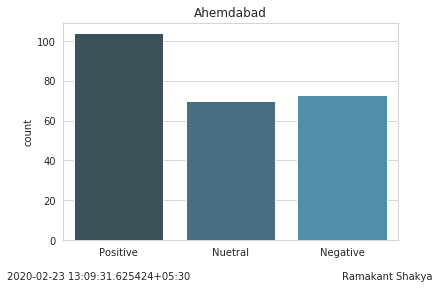

In [105]:
sns.countplot(ahem_senti)
plt.title('Ahemdabad')
plt.text(2,-20,'Ramakant Shakya')
plt.text(-1,-20,str(datetime.now(tz_India)))

Text(0, -25, '2020-02-23 13:11:03.591861+05:30')

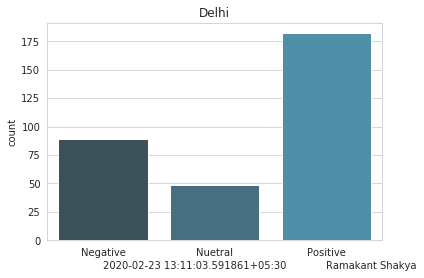

In [107]:
sns.countplot(delhi_senti)
plt.title('Delhi')
plt.text(2,-25,'Ramakant Shakya')
plt.text(0,-25,str(datetime.now(tz_India)))

Text(0, -20, '2020-02-23 13:11:30.059339+05:30')

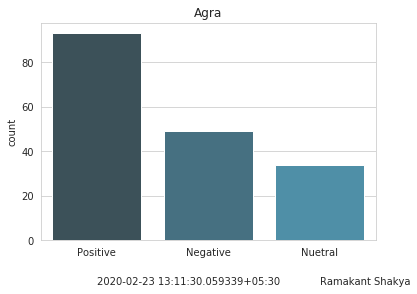

In [108]:
sns.countplot(agra_senti)
plt.title("Agra")
plt.text(2,-20,'Ramakant Shakya')
plt.text(0,-20,str(datetime.now(tz_India)))

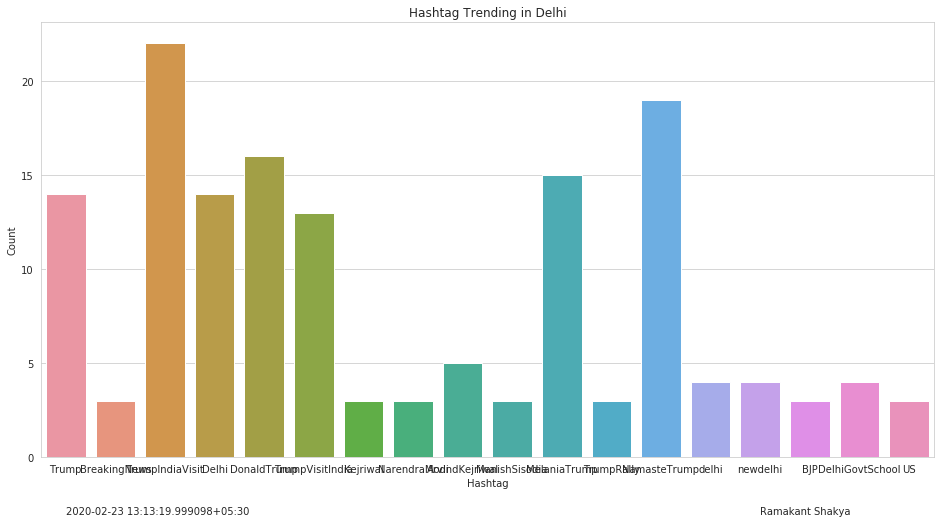

In [110]:
hashtag_count(delhi_tweets_copy,'Text','Delhi',3)

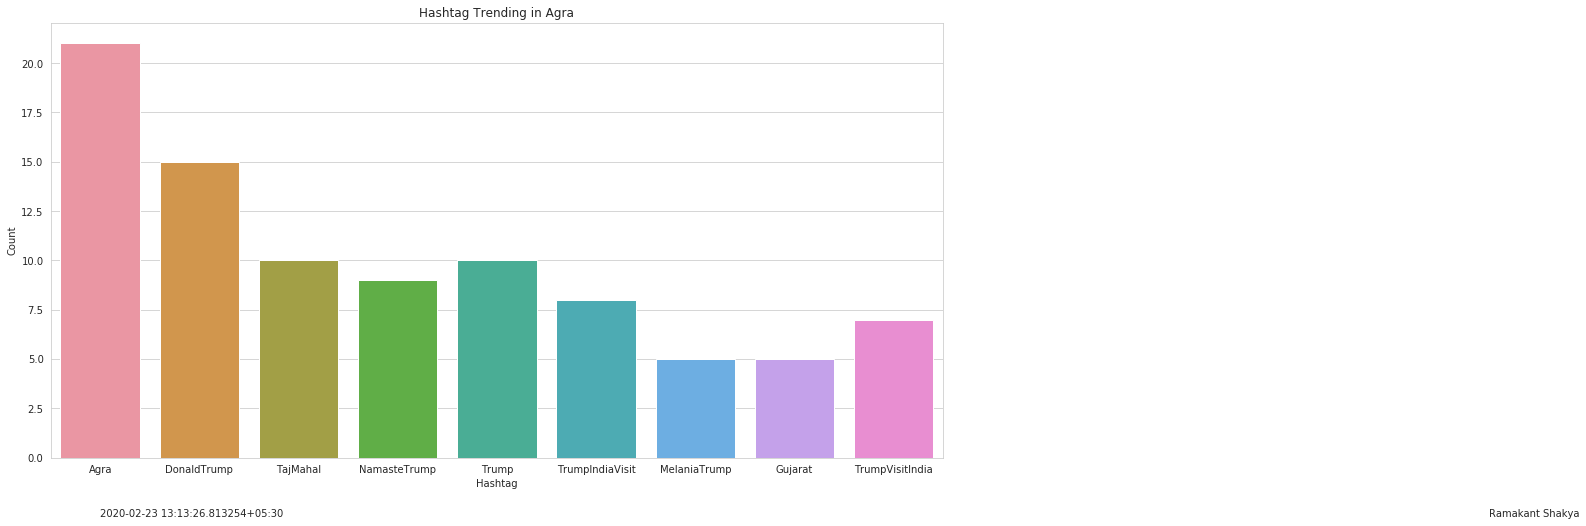

In [111]:
hashtag_count(agra_tweets_copy,'Text','Agra',5)

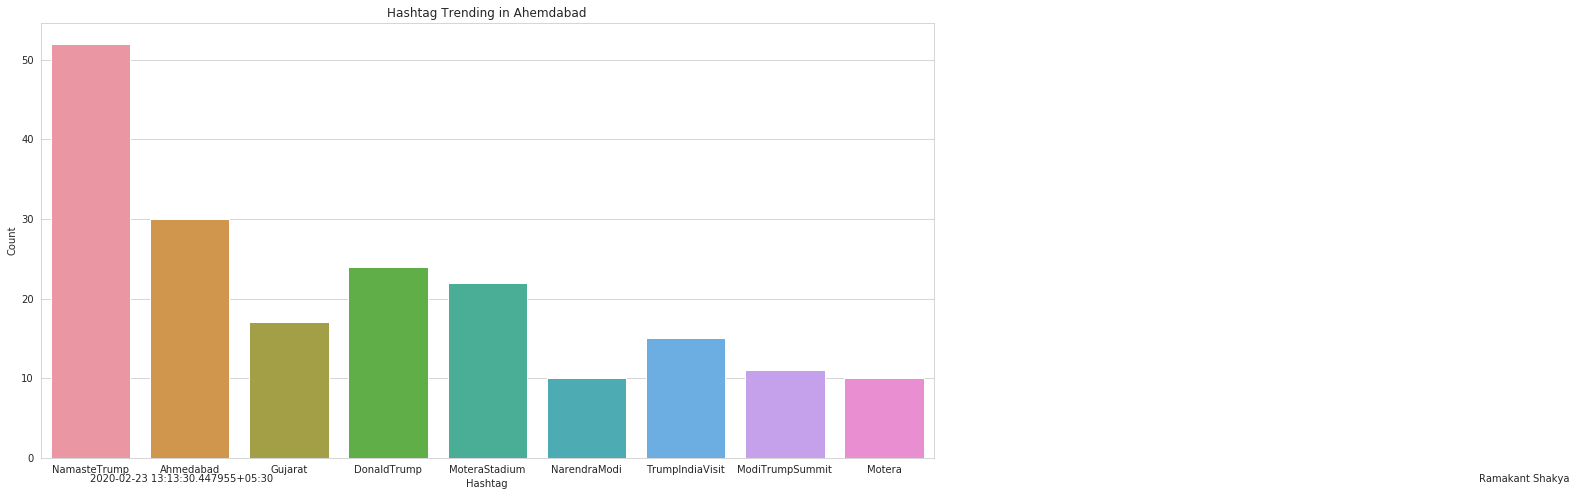

In [112]:
hashtag_count(ahem_tweets_copy,'Text','Ahemdabad',8)

Text(0, -3, '2020-02-23 13:14:28.410999+05:30')

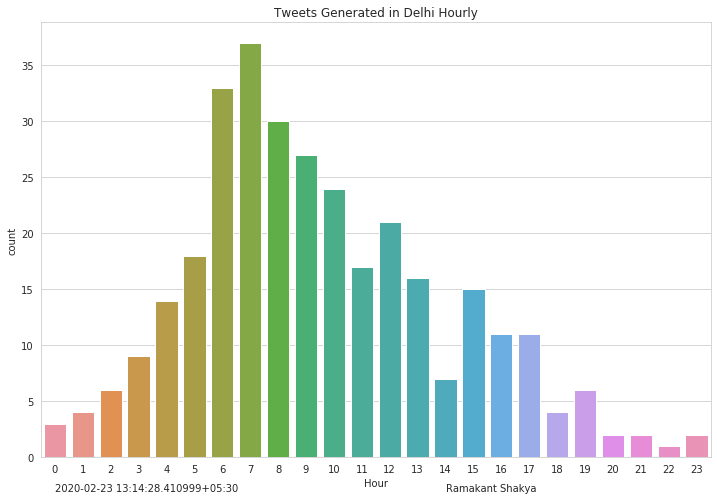

In [117]:
plt.figure(figsize=(12,8))
sns.countplot(delhi_tweets['Hour'])
plt.title('Tweets Generated in Delhi Hourly')
plt.text(14,-3,'Ramakant Shakya')
plt.text(0,-3,str(datetime.now(tz_India)))

Text(0, -3, '2020-02-23 13:14:13.337344+05:30')

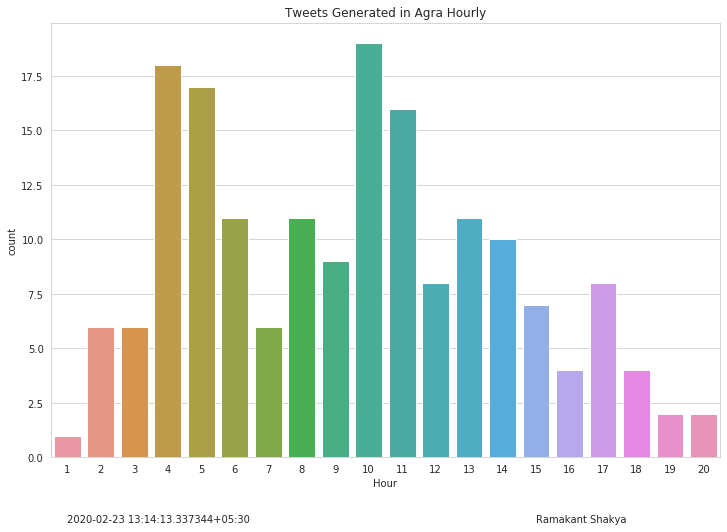

In [116]:
plt.figure(figsize=(12,8))
sns.countplot(agra_tweets['Hour'])
plt.title('Tweets Generated in Agra Hourly')
plt.text(14,-3,'Ramakant Shakya')
plt.text(0,-3,str(datetime.now(tz_India)))

Text(0, -3, '2020-02-23 13:14:39.216083+05:30')

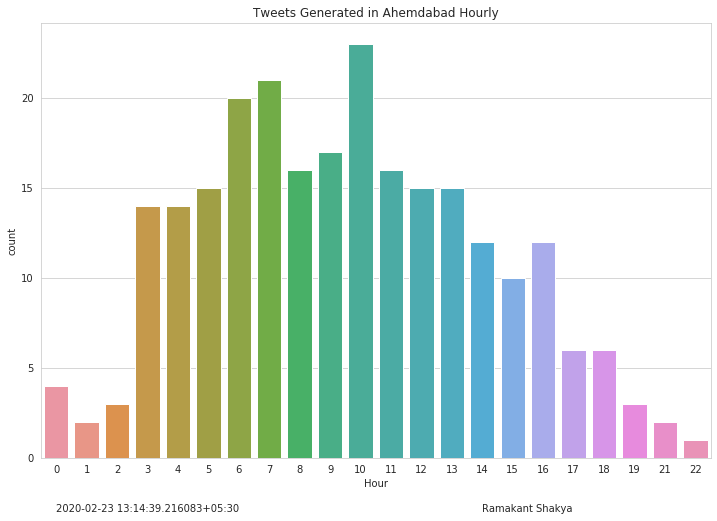

In [118]:
plt.figure(figsize=(12,8))
sns.countplot(ahem_tweets['Hour'])
plt.title('Tweets Generated in Ahemdabad Hourly')
plt.text(14,-3,'Ramakant Shakya')
plt.text(0,-3,str(datetime.now(tz_India)))

Text(0, -9, '2020-02-23 13:15:16.313703+05:30')

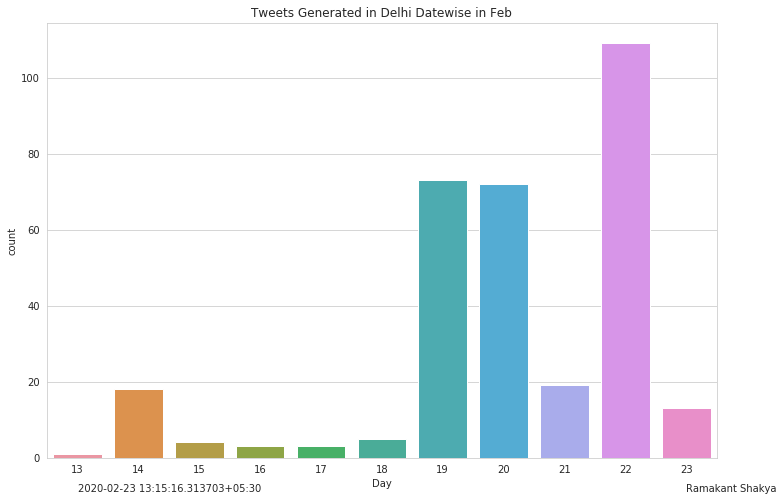

In [121]:
plt.figure(figsize=(12,8))
sns.countplot(delhi_tweets['Day'])
plt.title('Tweets Generated in Delhi Datewise in Feb')
plt.text(10,-9,'Ramakant Shakya')
plt.text(0,-9,str(datetime.now(tz_India)))

Text(0, -9, '2020-02-23 13:16:20.282092+05:30')

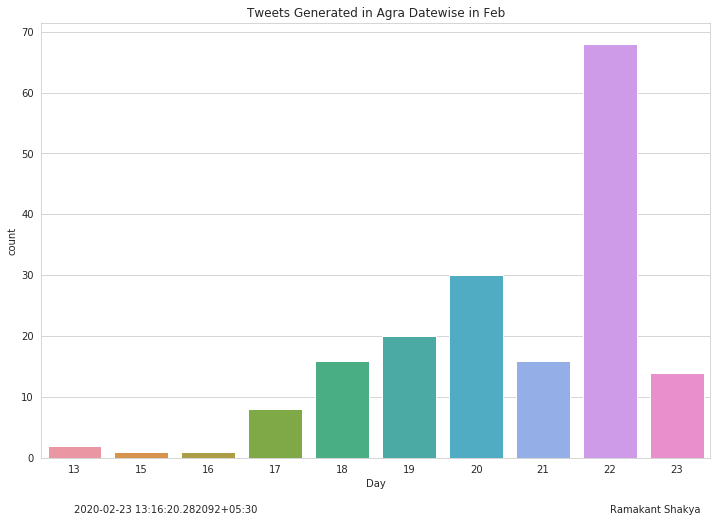

In [126]:
plt.figure(figsize=(12,8))
sns.countplot(agra_tweets['Day'])
plt.title('Tweets Generated in Agra Datewise in Feb')
plt.text(8,-9,'Ramakant Shakya')
plt.text(0,-9,str(datetime.now(tz_India)))

Text(0, -7, '2020-02-23 13:16:52.465770+05:30')

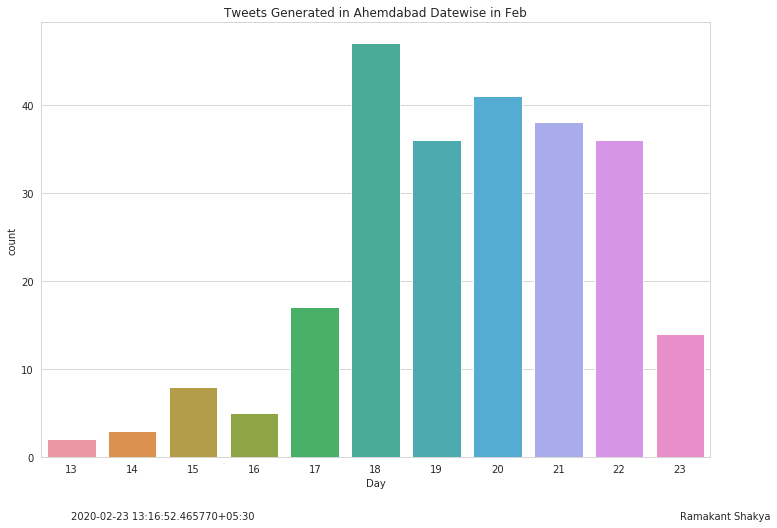

In [128]:
plt.figure(figsize=(12,8))
sns.countplot(ahem_tweets['Day'])
plt.title('Tweets Generated in Ahemdabad Datewise in Feb')
plt.text(10,-7,'Ramakant Shakya')
plt.text(0,-7,str(datetime.now(tz_India)))